In [2]:
using Statistics
using NetCDF
using PyPlot
 include("plotmap.jl");

In [3]:
fname="data/ERA5/2m_temperature/ERA5_2m_temperature_mon.year.nc"
ncinfo(fname) #information about the variables 
t=ncread(fname, "2t"); #name of the variables i want to read 
lon=ncread(fname, "lon");
lat=ncread(fname, "lat");
time=ncread(fname, "time");


##### NetCDF File #####

/home/jupyter-clima4/data/ERA5/2m_temperature/ERA5_2m_temperature_mon.year.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
lat                                                 180                       
time                                                UNLIMITED (70 currently)  
bnds                                                2                         
lon                                                 360                       

##### Variables #####

Name                            Type            Dimensions                      
--------------------------------------------------------------------------------
lat                             DOUBLE          lat                             
2t                              FLOAT           lon lat time                    
time                            DOUBLE         

In [1]:
xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);

LoadError: UndefVarError: lon not defined

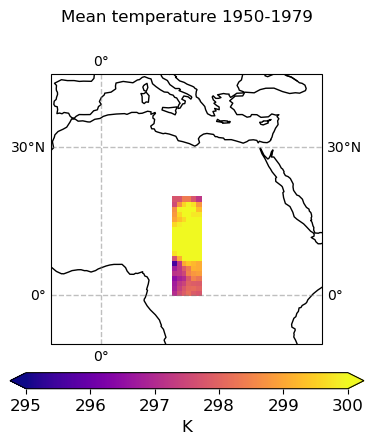

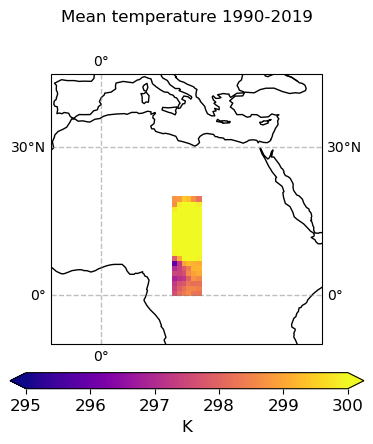

In [6]:
t1 = t[:,:,1:30];
t1mean=mean(t1,dims=3);
t2 = t[:,:,41:70];
t2mean=mean(t2,dims=3);

xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);
subplot(1)
plotmap(lon[xrange], lat[yrange], t1mean[xrange, yrange], 
        clabel="K", cstep=295:1:300, 
        titles="Mean temperature 1950-1979", 
        tfs=12, region=(-10, 45, -10,45), cmap="plasma")
figure()
plotmap(lon[xrange], lat[yrange], t2mean[xrange, yrange], 
        clabel="K", cstep=295:1:300, 
        titles="Mean temperature 1990-2019", 
        tfs=12, region=(-10, 45, -10,45), cmap="plasma")


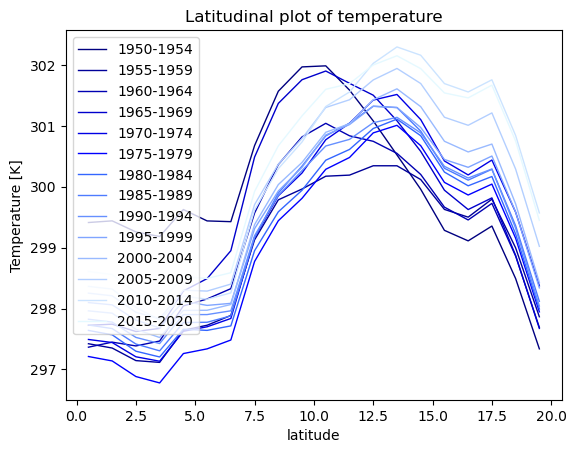

In [38]:
shades = ["#000080", "#000099", "#0000B2", "#0000CC", "#0000E5", "#0000FF", "#3366FF", "#4D7BFF", "#6690FF", "#80A5FF", "#99BAFF", "#B3CFFF", "#CCE4FF", "#E5F9FF"]

using PyPlot


xrange = (lon.>=15) .& (lon.<=20);
yrange = (lat.>=0) .& (lat.<=20);

t2mean = mean(t[xrange,yrange,1:4], dims=3);
t3mean = mean(t[xrange,yrange,5:9], dims=3);
t4mean = mean(t[xrange,yrange,10:14], dims=3);
t5mean = mean(t[xrange,yrange,15:19], dims=3);
t6mean = mean(t[xrange,yrange,20:24], dims=3);
t7mean = mean(t[xrange,yrange,25:29], dims=3);
t8mean = mean(t[xrange,yrange,30:34], dims=3);
t9mean = mean(t[xrange,yrange,35:39], dims=3);
t10mean = mean(t[xrange,yrange,40:44], dims=3);
t11mean = mean(t[xrange,yrange,45:49], dims=3);
t12mean = mean(t[xrange,yrange,50:54], dims=3);
t13mean = mean(t[xrange,yrange,55:59], dims=3);
t14mean = mean(t[xrange,yrange,60:64], dims=3);
t15mean = mean(t[xrange,yrange,65:70], dims=3);

Y=(t2mean, t3mean,t4mean,t5mean,t6mean,t7mean,t8mean,t9mean,t10mean,t11mean,t12mean,t13mean,t14mean,t15mean)
figure()

for (i, y) in enumerate(Y)
    plot(lat[yrange], mean(y, dims=1)[:], color=shades[i], label="Curve $i",linewidth=1)
end

xlabel("latitude"); ylabel("Temperature [K]"); title("Latitudinal plot of temperature"); legend(["1950-1954","1955-1959","1960-1964","1965-1969","1970-1974","1975-1979","1980-1984","1985-1989","1990-1994","1995-1999","2000-2004","2005-2009","2010-2014","2015-2020"] );


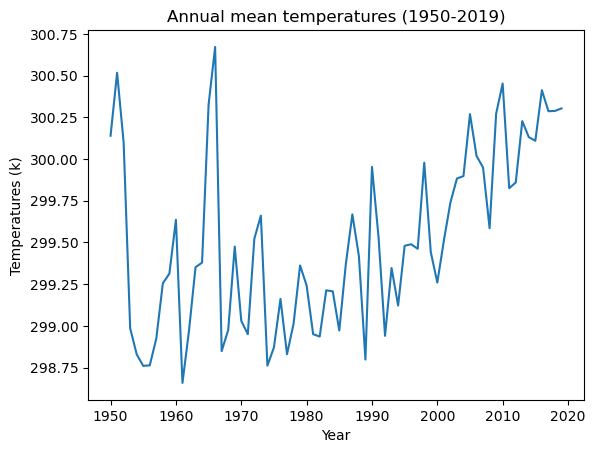

In [39]:
using PyPlot
years=1950:2019
Pannual_means = zeros(length(years))


for i in 1:length(years)
    y = t[xrange, yrange, i]
    Pannual_means[i] = mean(y)
end

plot(years, Pannual_means)
xlabel("Year")
ylabel("Temperatures (k)")
title("Annual mean temperatures (1950-2019)")
show()

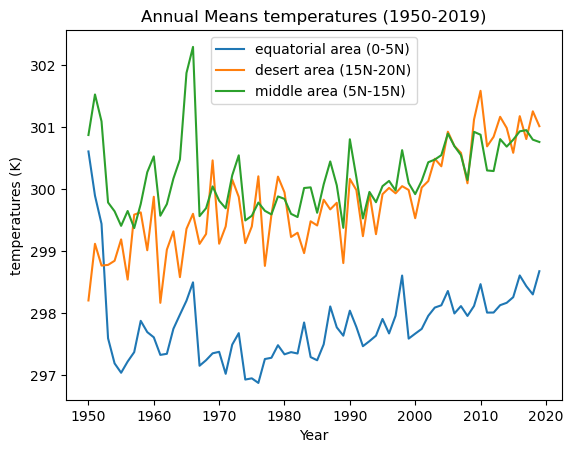

PyObject <matplotlib.legend.Legend object at 0x7f39b4cdd190>

In [40]:
using PyPlot
xrange = (lon.>=15) .& (lon.<=20);
yrange_equatorial = (lat.>=0) .& (lat.<=5);
yrange_desert = (lat.>=15) .& (lat.<=20);
yrange_middle = (lat.>=5) .& (lat.<=15);


years = 1950:2019
annual_means_equatorial = zeros(length(years))
annual_means_desert = zeros(length(years))
annual_means_middle = zeros(length(years))

for i in 1:length(years)
    y1 = t[xrange,yrange_equatorial, i]
    annual_means_equatorial[i] = mean(y1)

    y2 = t[xrange,yrange_desert, i]
    annual_means_desert[i] = mean(y2)

     y3 = t[xrange,yrange_middle, i]
    annual_means_middle[i] = mean(y3)


end

plot(years, annual_means_equatorial,years,annual_means_desert,years,annual_means_middle)
xlabel("Year")
ylabel("temperatures (K)")
title("Annual Means temperatures (1950-2019)")
show()
legend(["equatorial area (0-5N)","desert area (15N-20N)","middle area (5N-15N)"])


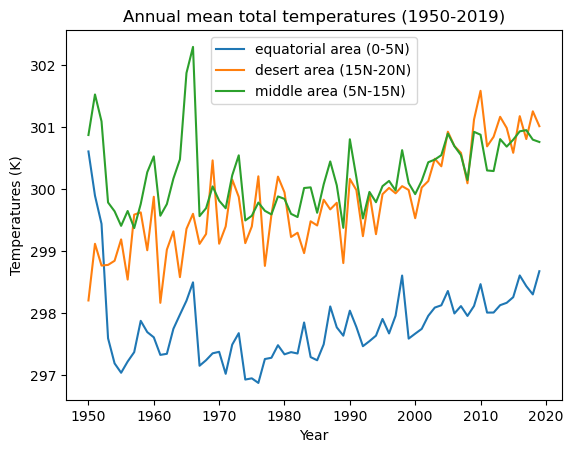

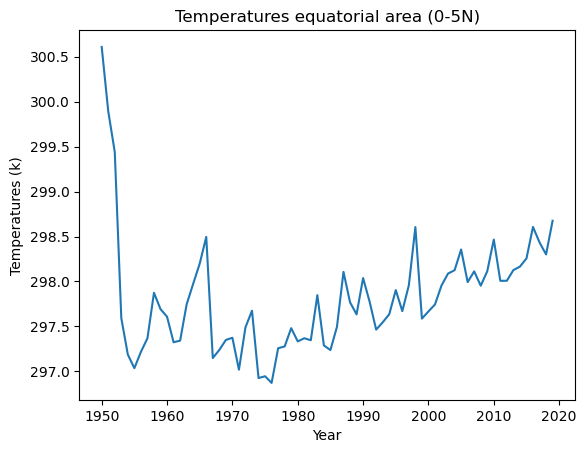

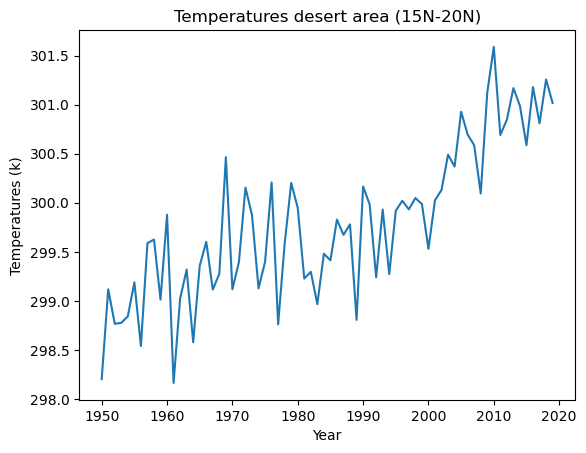

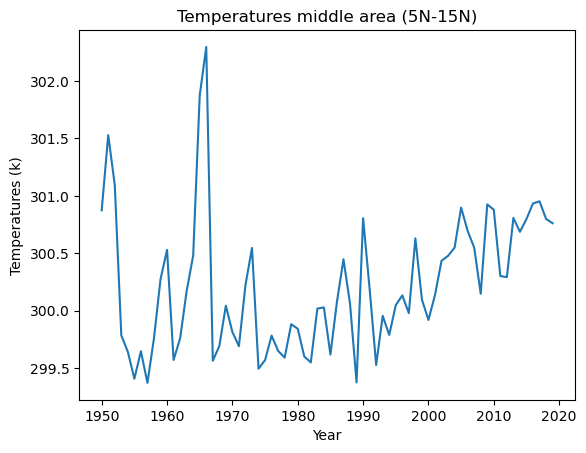

In [41]:
using PyPlot
xrange = (lon.>=15) .& (lon.<=20);
yrange_equatorial = (lat.>=0) .& (lat.<=5);
yrange_desert = (lat.>=15) .& (lat.<=20);
yrange_middle = (lat.>=5) .& (lat.<=15);

Tannual_means_equatorial = zeros(length(years))
Tannual_means_desert = zeros(length(years))
Tannual_means_middle = zeros(length(years))

for i in 1:length(years)
    y1 = t[xrange,yrange_equatorial, i]
    Tannual_means_equatorial[i] = mean(y1)

    y2 = t[xrange,yrange_desert, i]
    Tannual_means_desert[i] = mean(y2)

    y3 = t[xrange,yrange_middle, i]
    Tannual_means_middle[i] = mean(y3)

end

plot(years, Tannual_means_equatorial,years,Tannual_means_desert,years,Tannual_means_middle)
xlabel("Year")
ylabel("Temperatures (K)")
title("Annual mean total temperatures (1950-2019)")
show()
legend(["equatorial area (0-5N)","desert area (15N-20N)", "middle area (5N-15N)"])

means=(Tannual_means_equatorial,Tannual_means_desert,Tannual_means_middle);
titles=("Temperatures equatorial area (0-5N)","Temperatures desert area (15N-20N)","Temperatures middle area (5N-15N)");

for i in 1:3
    figure()
    plot(years,means[i])
    xlabel("Year")
    ylabel("Temperatures (k)")
    title(titles[i])
end

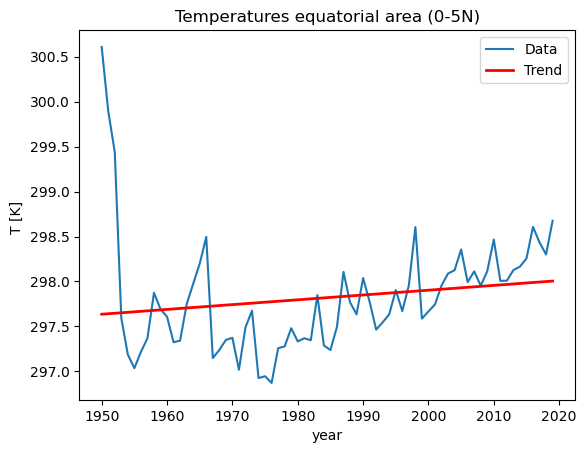

(0.1692, 0.005344523087061726)

In [42]:
#TRENDS
using Polynomials #minimise the error 

f=fit(years, Tannual_means_equatorial, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, Tannual_means_equatorial)
plot(years, trend,color=:red,linewidth=2)
xlabel("year"); ylabel("T [K] ");
title("Temperatures equatorial area (0-5N)")
legend(["Data","Trend","P/E=1"])

using Random
x=years
y=Tannual_means_equatorial
using Polynomials, Random
function shufflingfit(x, y,a; n=1000)  
  s=zeros(n,1)
  for i=1:n
    f=fit(x,shuffle(y),1)
    s[i]=f[1]
  end
  count = sum(abs.(s).>abs.(a))
  return (count/n) #count/n=count percentage
end
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a

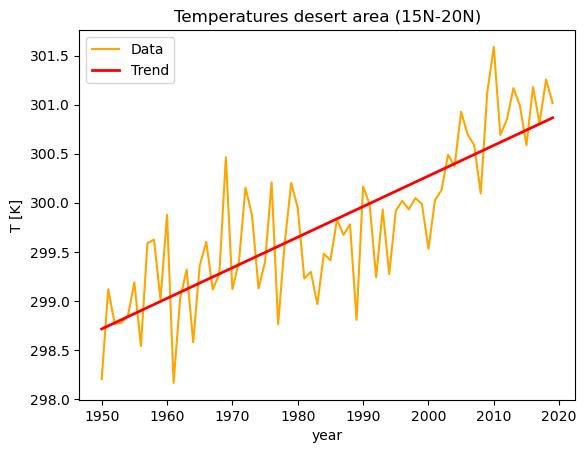

(0.0, 0.031176615249412183)

In [43]:
using Polynomials #minimise the error 

f=fit(years, Tannual_means_desert, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, Tannual_means_desert,color=:orange)
plot(years, trend,color=:red,linewidth=2)
xlabel("year"); ylabel("T [K]");
title("Temperatures desert area (15N-20N)")
legend(["Data","Trend","P/E=1"])
show()
y=Tannual_means_desert
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a

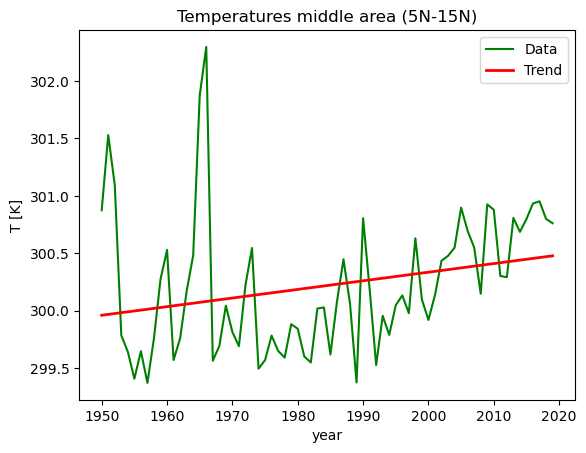

(0.0329, 0.0074992306932624795)

In [44]:
using Polynomials #minimise the error 

f=fit(years, Tannual_means_middle, 1) #the number before x is the variation per year of T
b=f[0]; a=f[1]; #parameters, a=SLOPE
trend=years*a .+ b;
plot(years, Tannual_means_middle,color=:green)
plot(years,trend,color=:red,linewidth=2)
xlabel("year"); ylabel("T [K]");
title("Temperatures middle area (5N-15N)")
legend(["Data","Trend","P/E=1"])
show()
y=Tannual_means_middle
(p) = shufflingfit(x,y,a, n=10000) #if p>0.05 the trend is not significant
p,a